5th Homework

Exercise 4

a)

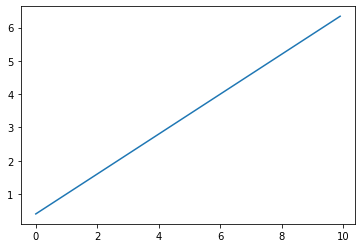

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math

my=1
mx=1
sy=2
sx=math.sqrt(5)
syx=3
x=np.arange(0,10,0.1)
Eyx=my+((syx*sy)/(sx*sx*sy))*(x-mx)

plt.plot(x,Eyx)
plt.show()

b)

In [52]:
N = 50
m = [1, 1]
Sigma = np.array([[4, 3],[3, 5]])
D =[]
for i in range(100):
    Di = np.random.multivariate_normal(m,Sigma, N)
    for j in range(N):
        Di[j,0]=Di[j,0]+np.random.normal(0,0.1,1)
    D.append(Di)

c)

In [53]:
theta=[]
for i in range(100):
    X=D[i][:,1]
    X=np.array([np.ones(N),X])
    X=X.T
    y=D[i][:,0]
    XTX=np.dot(X.T,X)
    XTXinv=np.linalg.inv(XTX)
    XTy=np.dot(X.T,y)
    thetai=np.dot(XTXinv,XTy)
    theta.append(thetai)

d)

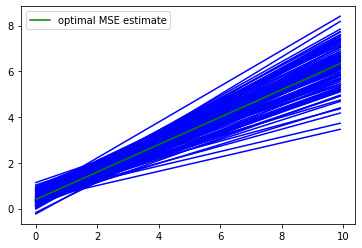

In [54]:
for i in range(100):
    yestimate=theta[i][0]+theta[i][1]*x
    plt.plot(x,yestimate,'b')
plt.plot(x,Eyx,'g',label='optimal MSE estimate')
plt.legend()
plt.show()

e)

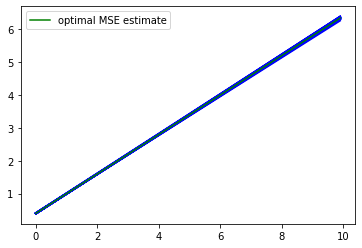

In [55]:
N = 50000
m = [1, 1]
Sigma = np.array([[4, 3],[3, 5]])
D =[]
for i in range(100):
    Di = np.random.multivariate_normal(m,Sigma, N)
    for j in range(N):
        Di[j,0]=Di[j,0]+np.random.normal(0,0.1,1)
    D.append(Di)
    
theta=[]
for i in range(100):
    X=D[i][:,1]
    X=np.array([np.ones(N),X])
    X=X.T
    y=D[i][:,0]
    XTX=np.dot(X.T,X)
    XTXinv=np.linalg.inv(XTX)
    XTy=np.dot(X.T,y)
    thetai=np.dot(XTXinv,XTy)
    theta.append(thetai)

for i in range(100):
    yestimate=theta[i][0]+theta[i][1]*x
    plt.plot(x,yestimate,'b')
plt.plot(x,Eyx,'g',label='optimal MSE estimate')
plt.legend()
plt.show()

f)

We can conclude from the results, that when the N takes the value of 5000 from 50 the variance of the MSE decreases significantly. As the N is getting bigger, the variance of the MSE is getting closer to zero. The bias also takes a small value, as the model we adapted has the same complexity as the real model. 

Exercise 5

a)

In [61]:
N = 100
m = [1, 1]
Sigma = np.array([[4, 3],[3, 5]])
D =np.random.multivariate_normal(m,Sigma, N)
for i in range(N):
    D[i,0]=D[i,0]+np.random.normal(0,0.1,1)

b)

In [62]:
X=D[:,1]
X=np.array([np.ones(N),X])
X=X.T
y=D[:,0]
XTX=np.dot(X.T,X)
XTXinv=np.linalg.inv(XTX)
XTy=np.dot(X.T,y)
theta=np.dot(XTXinv,XTy)
print(theta)

[0.15645846 0.58885883]


c)

In [63]:
N=50
D =np.random.multivariate_normal(m,Sigma, N)
for i in range(N):
    D[i,0]=D[i,0]+np.random.normal(0,0.1,1)
fx=[]
for i in range(50):
    fi=theta[0]+theta[1]*D[i,1]
    fx.append(fi)

d)

In [64]:
my=1
mx=1
sy=2
sx=math.sqrt(5)
syx=3
Eyx=[]
for i in range(50):
    Eyxi=my+((syx*sy)/(sx*sx*sy))*(D[i,1]-mx)
    Eyx.append(Eyxi)

e)

In [65]:
fx=np.array(fx)
Eyx=np.array(Eyx)
MSE=np.mean((fx-Eyx)**2)
print(MSE)

0.06579868205332837


A lower MSE indicates a better performance, as fx and Eyx are similar to each other.

Exercise 6

a)

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import math

N=100
test=np.random.uniform(0,1,size=(1000,2))
for i in range(1000):
    test[i,1]=test[i,1]+np.random.normal(0,0.1,1)

Dtest=[]
for i in range(1000):
    if (test[i,1]>test[i,0]**3) & (test[i,1]<1):
        Dtest.append(test[i,:])
   
D=[]
for i in range(N):
    D.append(Dtest[i])
       
D=np.array(D)

ytruepdf=(1/2)*(1+(D[:,0])**3)

b)

In [108]:
m=[np.mean(D[:,0]),np.mean(D[:,1])]
m=np.array(m)
S=(1/N)*np.dot((m-D).T,(m-D))
print(m)
print(S)

[0.409812  0.5531454]
[[0.05949784 0.01987693]
 [0.01987693 0.07070888]]


c)

In [109]:
a=S[0,0]/(math.sqrt(S[0,0])*math.sqrt(S[1,1]))
yest=m[1]+a*(math.sqrt(S[1,1])/math.sqrt(S[0,0]))*(D[:,0]-m[0])

MSEest=np.mean((yest-D[:,1])**2)
MSEtruepdf=np.mean((ytruepdf-D[:,1])**2)
MSE=np.mean((yest-ytruepdf)**2)    
print(MSEest)
print(MSEtruepdf)
print(MSE)

0.09045286031019438
0.06057869575961061
0.027424967280418405


d)

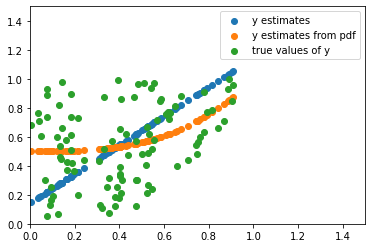

In [112]:
plt.scatter(D[:,0],yest,label='y estimates')
plt.scatter(D[:,0],ytruepdf,label='y estimates from pdf')
plt.scatter(D[:,0],D[:,1],label='true values of y')
plt.legend()
plt.ylim(0,1.5)
plt.xlim(0,1.5)
plt.show()

It can be observed from the graph that the y estimates and the y estimates from the pdf are close to each other. This is the case as the data are uniform distributed. Even though the complexity of the two different estimates are different, the predicted y values are close to each other. This may be the reason as the data were constructed from a specific uniform distribution. The true values of y computed in (a) are distributed around the lines that y estimates and y estimates from the pdf are creating. We can also observe that the y estimates and y generated from pdf do not explain perfectly the true values of y. The different MSEs that were calculated in the previous section confirm the above statements.